<a href="https://colab.research.google.com/github/FelixEbenezer/ML_DataSicence_IA_Business/blob/main/DS_Businness_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. DEPARTEMENT DE MARKETING

In [ ]:
#Département marketing : optimisation de la stratégie marketing en effectuant une segmentation de la clientèle
#Le but est de comprendre le comportement des clients pour leur envoyer les campagnes publicitaires personnalisés tout en agroupant les clients selon
#certains critères
#Donc on va travailler avec les techniques d agroupement de ML - IA selon les caracteristiques similaires de clients
#On va se baser sur une dataset d une banque 

A) Import des bibliotheques et bdd

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
path = '/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios-20220517T094434Z-001.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [4]:
creditcard_df = pd.read_csv('/content/Ciência de Dados para Empresas e Negócios/Bases de dados/Marketing_data.csv')

In [5]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
creditcard_df.shape

(8950, 18)

In [7]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


B) Analyse exploratoire des données: Pre-traitemente et visualisation

In [10]:
import seaborn as sns

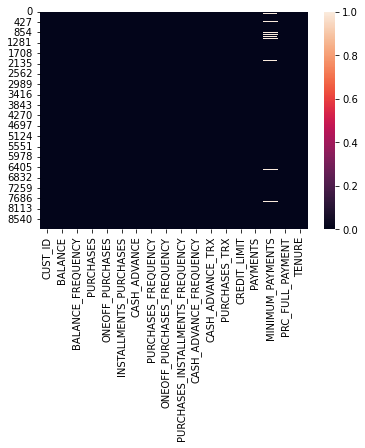

In [11]:
sns.heatmap(creditcard_df.isnull());  #Donc il y a certianes valeurs null

In [12]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#Comme il y a seulement une valeur null ou peu, on peut les remplir par la valeur MEAN au lieu de les éliminer

In [13]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [14]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [15]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

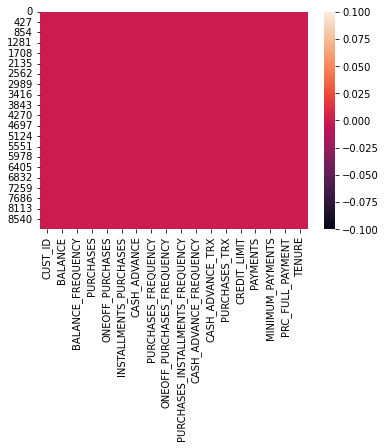

In [16]:
sns.heatmap(creditcard_df.isnull());

In [ ]:
#On peut aussi verifier si il y des valeurs redundantes

In [17]:
creditcard_df.duplicated().sum()

0

In [ ]:
#La colonne CUST_ID n´est pas important pour notre analyse, donc on peut l eliminer

In [18]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [19]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#VISUALISATION

In [ ]:
#On va donc faire des correlations et analyse des données entre elles 

In [20]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

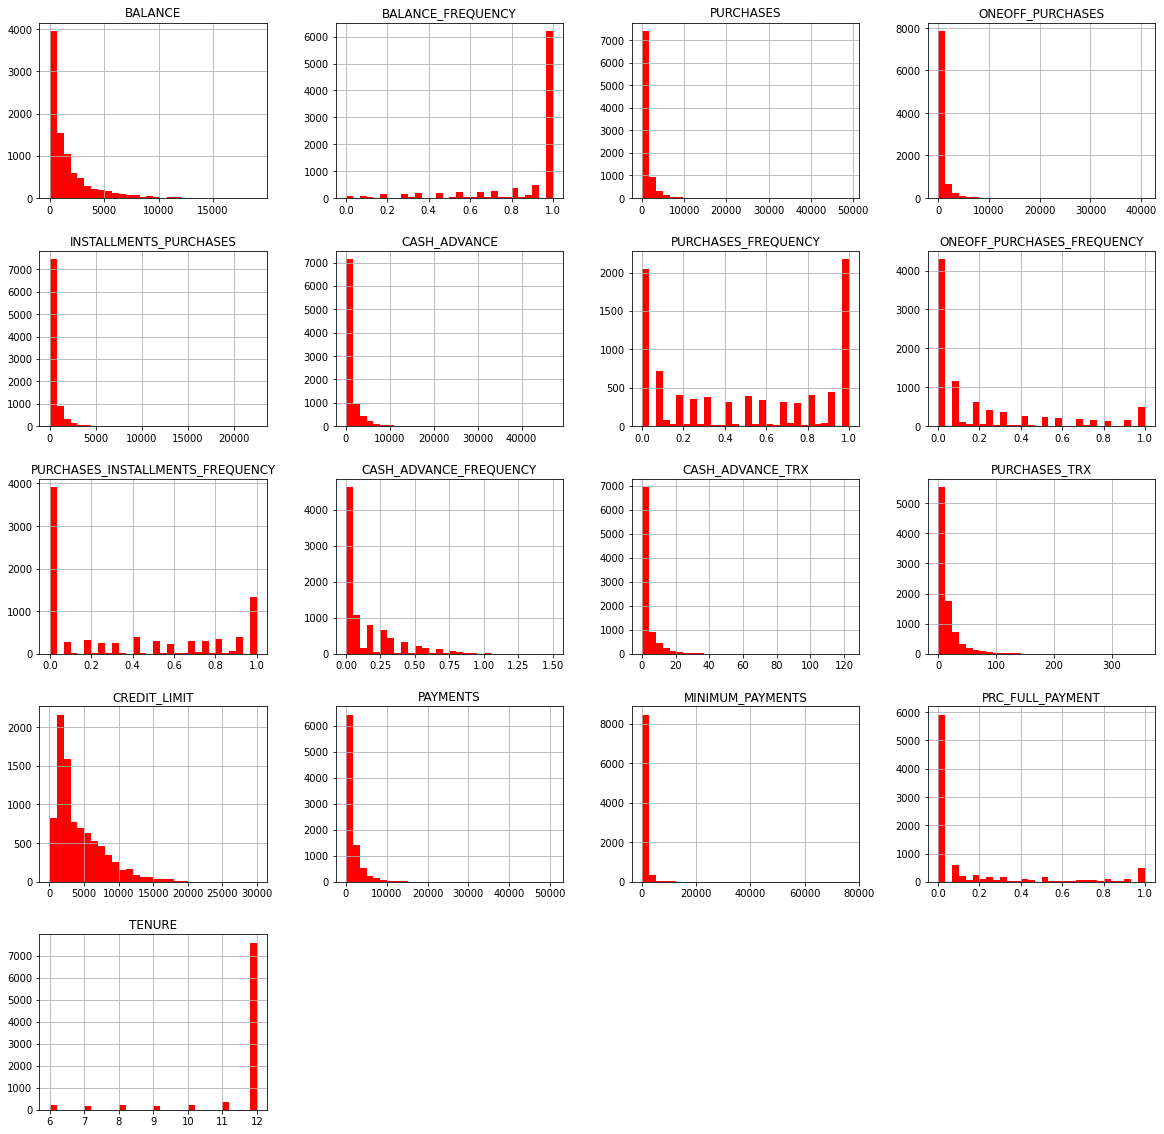

In [21]:
creditcard_df.hist(bins=30, figsize=(20,20), color='r'); 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

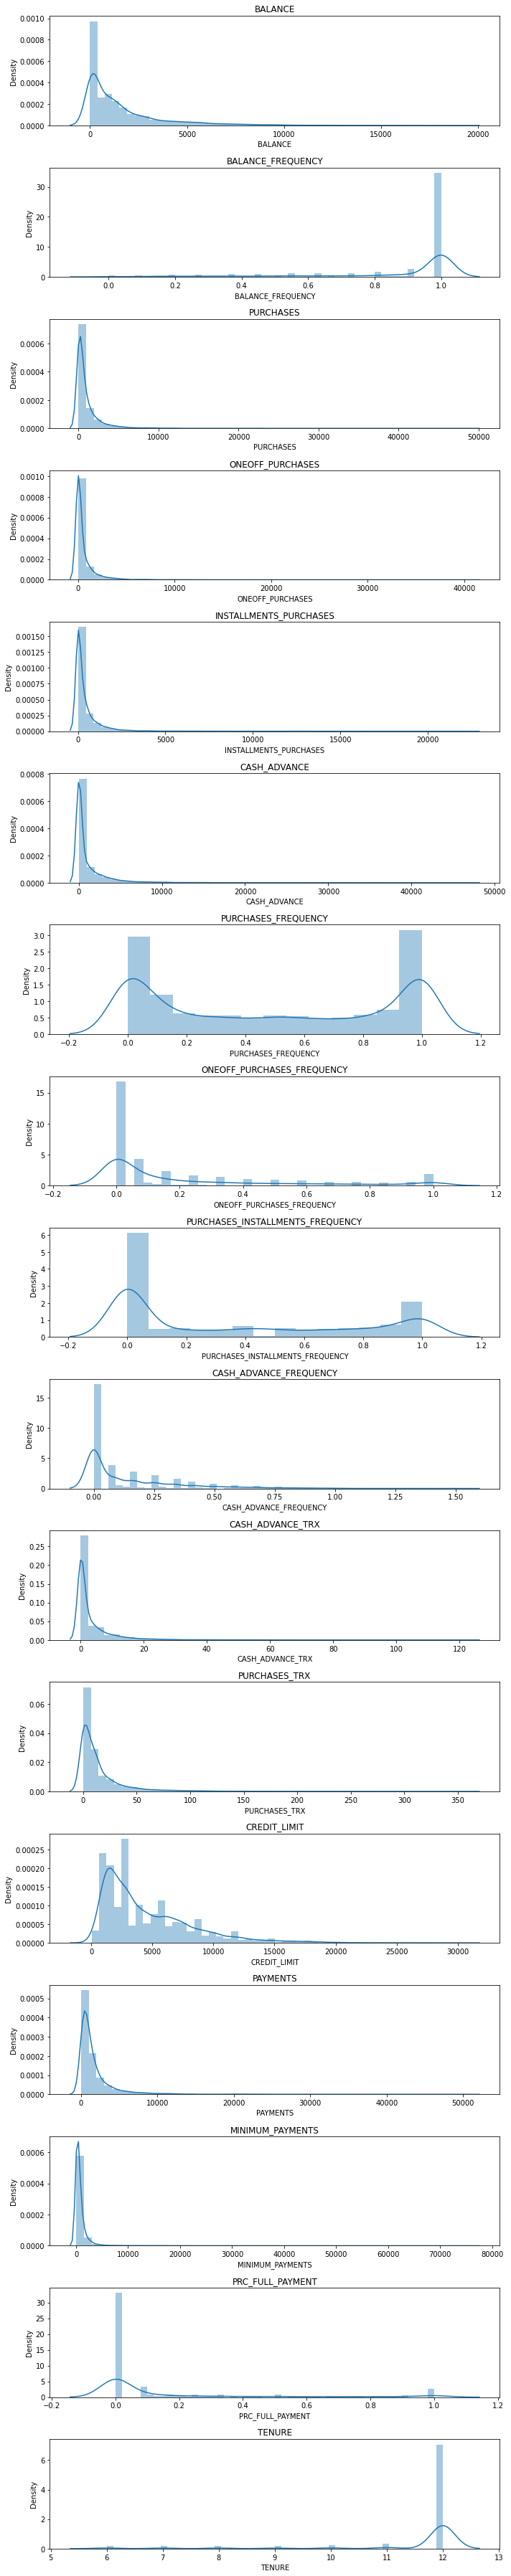

In [22]:
#On peut aussi faire cette visualisation autrement avec une boucle for:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [ ]:
#CORRELATION

In [23]:
correlations = creditcard_df.corr()

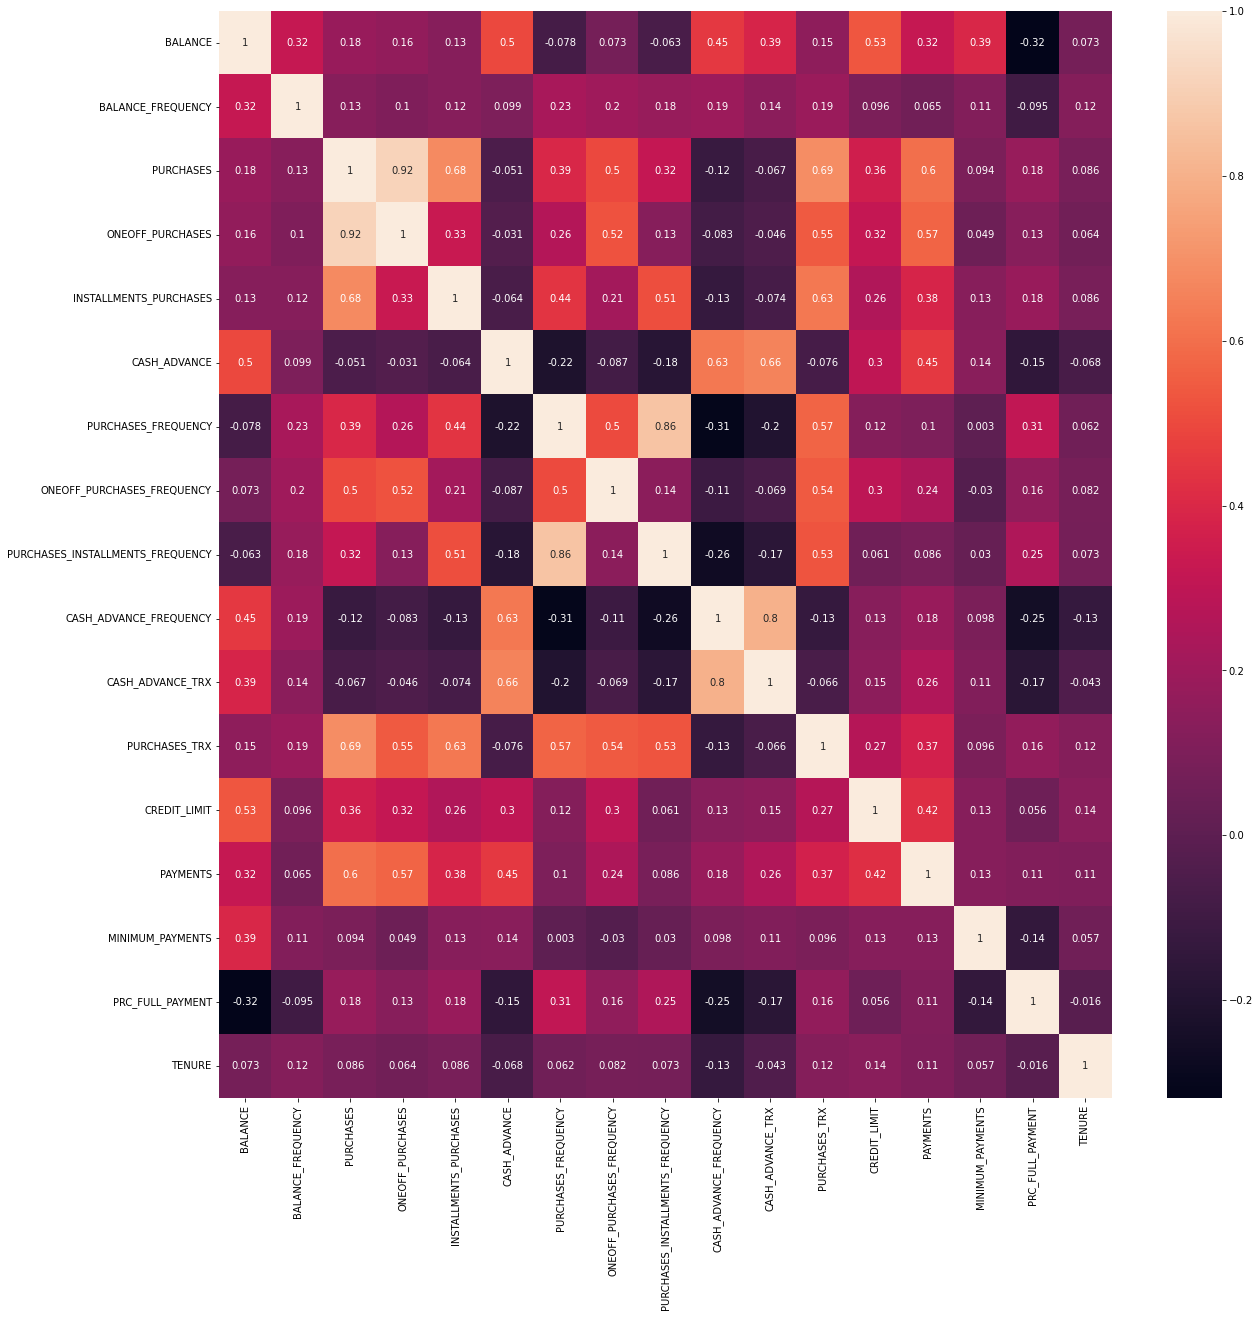

In [24]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

#3. GROUPEMENT K-MEANS

In [ ]:
#k-means, C est un algo non supervisionné (Clustering - agroupement) dont les registres sont agroupés selon les atributs similaires par le biais
#de calcul de la distance euclidienne

a) Obtention de numero de clusters avec ELBOW METHOD

In [ ]:
#On va utiliser la definition de numero de clusters avec la methode de ELBOW METHOD dont plus de details sont ici:
#https://en.wikipedia.org/wiki/Elbow_method_(clustering)
#https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
Méthode du coude (clustering)

Dans l'analyse de grappes , la méthode du coude est une heuristique utilisée pour déterminer le nombre de grappes dans un ensemble de données . 
La méthode consiste à tracer la variation expliquée en fonction du nombre de clusters, et à choisir le coude de la courbe comme nombre de clusters à utiliser. 
La même méthode peut être utilisée pour choisir le nombre de paramètres dans d'autres modèles basés sur les données, tels que le nombre 
de composants principaux pour décrire un ensemble de données.

In [ ]:
#Pour determiner le nbre de clusters  initial, on analyse le min / max d´une colonne pour en avoir l idee de combien de groupe peut en sortir

In [25]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [ ]:
#Les valeurs sont comprises entre 0 et 19000, du coup on peut envisager une valeur de 20 clusters comme initial 

In [26]:
#Pour aplliquer cette methode de coude, on doit d abord transformer les données pour éviter l ordre de grandeur:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [27]:
#On peut alias confirmer en revoyant les valeurs min et max de BALANCE qui ne seront plus entre 0 et 19mil
#Du coup on ne peut plus faire min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE']), car on doit considerer maintenant credicard_df_scaled, qui n est pas
#un dataframe mais sim un Ndarray, dont les colonnes de la dataframe sont symbolisées par les indices, pour acceder á l indice 1 qui correspond a BALANCE , j ai fait:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [28]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [36]:
len(creditcard_df_scaled)

8950

In [30]:
#Du coup on va parcourir notre dataset scaled pour créer 20 clusters avec les calculs de distance k-means appelés wcss
from sklearn.cluster import KMeans

wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [31]:
#On peut maintenant voir la valeur qui sera considéré comme le centre pour chaque cluster, il y en a 20
print(wcss_1)

[152149.99999999983, 127784.92103208725, 111986.64440741186, 99074.42270603357, 91808.0478957353, 84851.13240432573, 79576.33045304354, 75579.20198643839, 69856.7699184285, 66614.20263821592, 63641.873637654164, 61353.598374154244, 59599.10004082676, 57486.741010859536, 55920.862308466705, 54465.49137454238, 52971.28317869651, 51892.68882423968, 50948.29744817196]


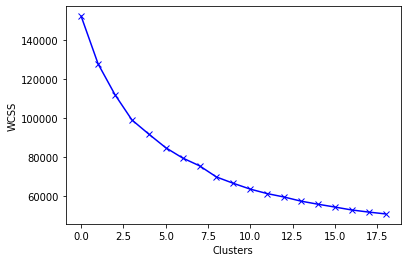

In [34]:
#On peut maintenant le visualiser sous forme de COUDE pour pouvoir choisir notre nbre de clusters, ce nbre sera justement ou on considere voir la coude notre
#courbe(justement c est aux alentours de 7 a 8)
plt.plot(wcss_1, 'bx-')  #bx pour ajouter les petits traits sur notre courbe 
plt.xlabel('Clusters')
plt.ylabel('WCSS');

B) Groupement K-MEANS

In [35]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [37]:
#On peut voir les labels de chque groupe et la total des personnes incluses dans tous les groupes, qui doit correspondre a total de clients de notre bdd: 8950
labels, len(labels)

(array([7, 6, 1, ..., 4, 4, 4], dtype=int32), 8950)

In [38]:
#Et si on veut voir le nbre de personnes dans chaque groupe , on fait:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1178, 1089,  403,   30,  623, 2024,  871, 2732]))

In [39]:
#et si on veut voir les données de chaque colonne (20 au total) pour chaque groupe, tout en rappelant que pour chaque colonne c est la moyenne qui est prise
kmeans.cluster_centers_

array([[-7.01325098e-01, -2.14419750e+00, -3.12313664e-01,
        -2.37424421e-01, -3.02155286e-01, -3.22032335e-01,
        -5.56162003e-01, -4.45540580e-01, -4.38919451e-01,
        -5.21111701e-01, -3.76057188e-01, -4.19737000e-01,
        -1.77231419e-01, -2.03088898e-01, -2.56844877e-01,
         2.81469600e-01,  2.01462619e-01],
       [-1.72926170e-01,  3.92199167e-01,  4.97635931e-01,
         6.40055480e-01,  6.03405282e-04, -3.37185155e-01,
         9.58748439e-01,  1.90718350e+00,  1.04230649e-01,
        -4.22897854e-01, -3.36934704e-01,  5.52192047e-01,
         3.96423932e-01,  1.15444409e-01, -1.67309085e-01,
         4.54387005e-01,  2.63243136e-01],
       [ 9.79527870e-01,  4.67519020e-01,  2.27079155e+00,
         1.70887469e+00,  2.22980812e+00, -1.86119991e-01,
         1.16101018e+00,  1.53120238e+00,  1.26578787e+00,
        -3.00358234e-01, -2.00451392e-01,  2.83375570e+00,
         1.23556773e+00,  1.29281002e+00,  6.49751062e-01,
         2.34752134e-01,  3.3

In [40]:
#Si on veut voir ces donnees de toutes les colonnes que le groupe 1, , tout en rappelant que pour chaque colonne c est la moyenne qui est prise
#cad k-means fait la moyenne de la colonne1 de tous les particpants de ce groupe, il retoure la valeur -0.7013251, ainsi de suite 
kmeans.cluster_centers_[0]

array([-0.7013251 , -2.1441975 , -0.31231366, -0.23742442, -0.30215529,
       -0.32203234, -0.556162  , -0.44554058, -0.43891945, -0.5211117 ,
       -0.37605719, -0.419737  , -0.17723142, -0.2030889 , -0.25684488,
        0.2814696 ,  0.20146262])

In [41]:
#on doit reconvertir ces donnees de clusters de ndarray en DataFrame pour mieux les analyser
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701325,-2.144198,-0.312314,-0.237424,-0.302155,-0.322032,-0.556162,-0.445541,-0.438919,-0.521112,-0.376057,-0.419737,-0.177231,-0.203089,-0.256845,0.281470,0.201463
1,-0.172926,0.392199,0.497636,0.640055,0.000603,-0.337185,0.958748,1.907184,0.104231,-0.422898,-0.336935,0.552192,0.396424,0.115444,-0.167309,0.454387,0.263243
2,0.979528,0.467519,2.270792,1.708875,2.229808,-0.186120,1.161010,1.531202,1.265788,-0.300358,-0.200451,2.833756,1.235568,1.292810,0.649751,0.234752,0.338429
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,-0.336717,-0.351618,-0.289556,-0.216192,-0.287105,0.068131,-0.204713,-0.289287,-0.225660,0.308086,0.000466,-0.388444,-0.566467,-0.392990,-0.208809,0.013145,-3.202809
5,-0.364451,0.333736,-0.036828,-0.240959,0.355418,-0.363447,0.990359,-0.378570,1.202898,-0.471472,-0.358494,0.190230,-0.257823,-0.216077,-0.055154,0.309444,0.256568
6,1.678446,0.391857,-0.217863,-0.155553,-0.229424,2.016217,-0.474969,-0.206237,-0.416691,1.923960,1.937819,-0.264310,1.023535,0.822071,0.508768,-0.391178,0.069847
7,0.017398,0.403546,-0.359011,-0.243831,-0.400804,-0.092968,-0.860713,-0.402830,-0.756645,0.106065,-0.026968,-0.484105,-0.303418,-0.250477,-0.004434,-0.456843,0.272881


In [42]:
#La en les données sont au format Scaled, on doit le reconvertir une fois de plus en chifrres normaux ou initiaux afin de mieux les analyser:
cluster_centers = scaler.inverse_transform(cluster_centers) #Reconversion en version initiale des données 
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns]) #Et on le retransforme en Dataframe
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.725835,0.369330,335.941876,198.361460,137.832368,303.554263,0.267136,0.069544,0.190000,0.030864,0.682513,4.276740,3849.609036,1145.221391,265.640390,0.236040,11.786927
1,1204.543601,0.970179,2066.411671,1654.798375,411.613297,271.778092,0.875143,0.771408,0.405861,0.050518,0.949495,28.435262,5936.801903,2067.344106,474.299778,0.286615,11.869605
2,3603.279406,0.988022,5854.785980,3428.819355,2427.455459,588.568798,0.956320,0.659245,0.867494,0.075039,1.880893,85.146402,8989.950372,5475.702196,2378.423983,0.222376,11.970223
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,863.627544,0.793976,384.563451,233.602408,151.442584,1121.745122,0.408189,0.116158,0.274754,0.196795,3.252006,5.054575,2433.410031,595.475430,377.585275,0.157559,7.231140
5,805.901585,0.956330,924.521492,192.495316,732.467520,216.705199,0.887829,0.089523,0.842500,0.040798,0.802372,19.438241,3556.383499,1107.623412,735.673267,0.244222,11.860672
6,5058.018586,0.970098,537.737279,334.251309,203.602698,5206.973248,0.299723,0.140933,0.198834,0.520148,16.473020,8.140069,8218.489719,4112.958895,2049.869682,0.039302,11.610792
7,1600.688094,0.972867,236.171969,187.727328,48.625783,783.913762,0.144905,0.082286,0.063727,0.156369,3.064788,2.676794,3390.489263,1008.036714,853.872714,0.020096,11.882504


In [ ]:
#Don la on a les 7 groupes, et pour chaque groupe on a la moyenne de chaque colonne de tous les participants pour chacune de colonnes affichées
#Maintenant place à l´interpretation des données de chaque groupe 

INTERPRETATION DE GROUPES:
Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863)

c) Insertion de chaque client dans un cluster correspondant 

In [43]:
#On va concatener notre dataset initial credicard_df au nouveau qui contient toutes les valeurs de labels en nomant la colonne cluster
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head() #Et on peut voir directment que chaque client est incorporé dans son cluster correspondant 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


In [ ]:
#Pour mieux les visualiser, on crée pour chaque colonne, un graphique gerant chaque grouep, cad pour la colonne 1 , on aura 7 graphiques montrant la correlation
#de BALANCE par rapport a chaque groupe, et sucessivement, on aura donc le nbre de colonnes (18) x 7 graphiques

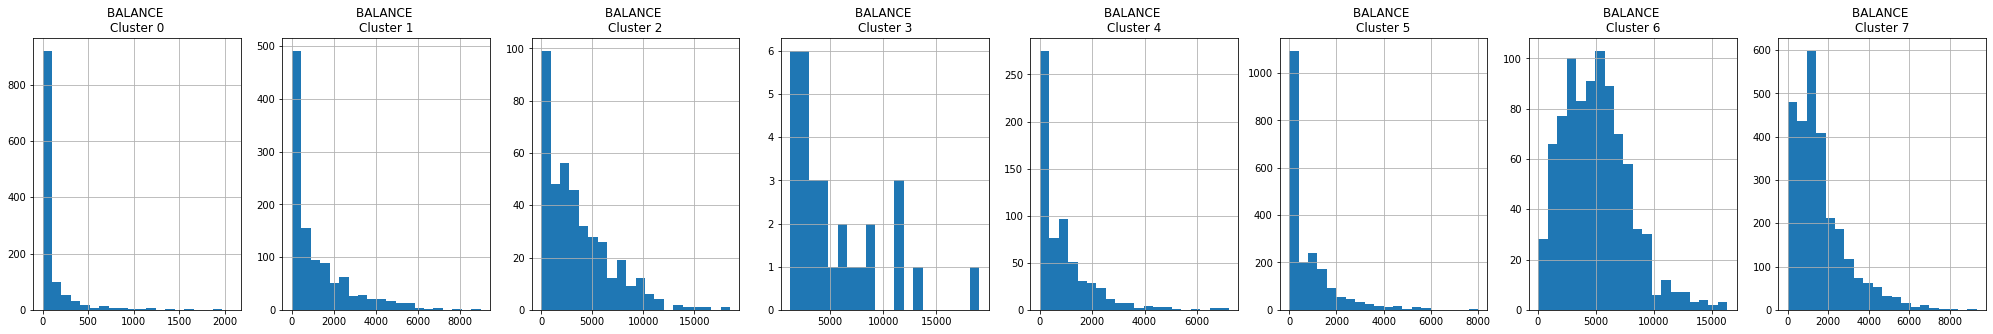

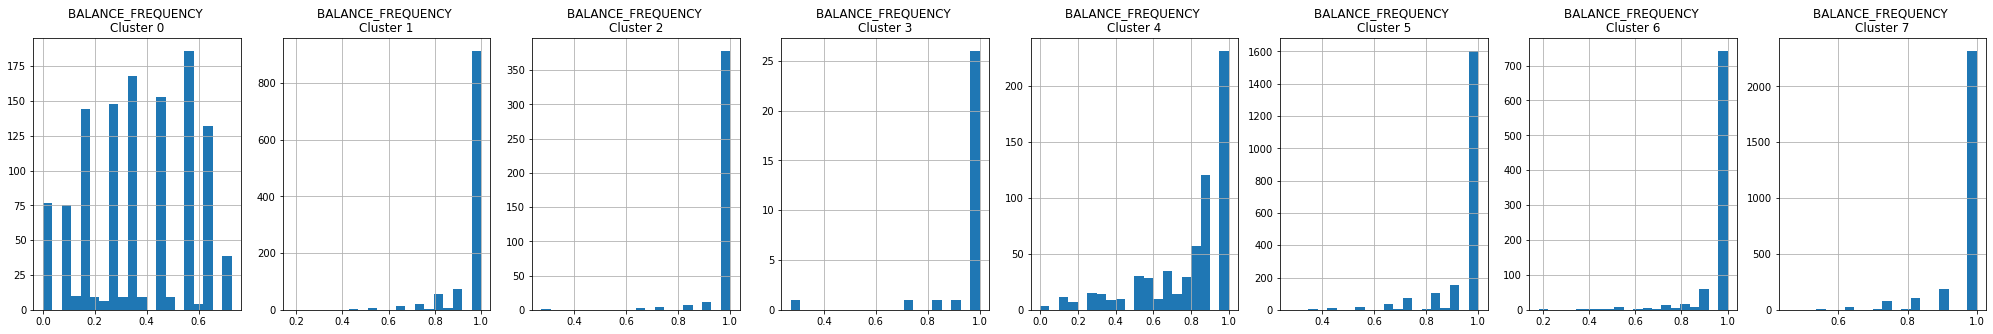

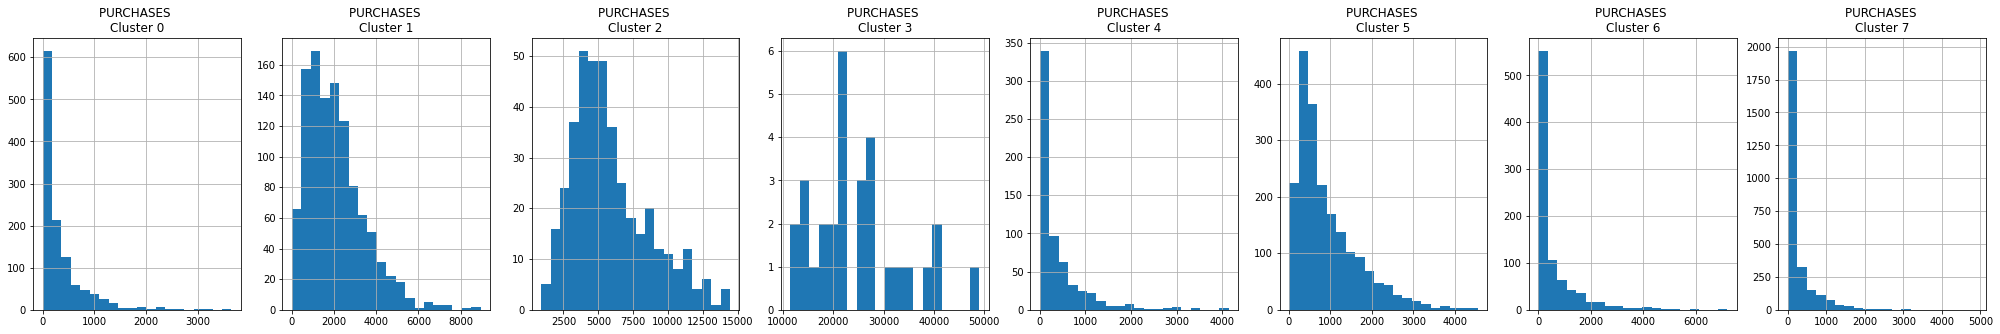

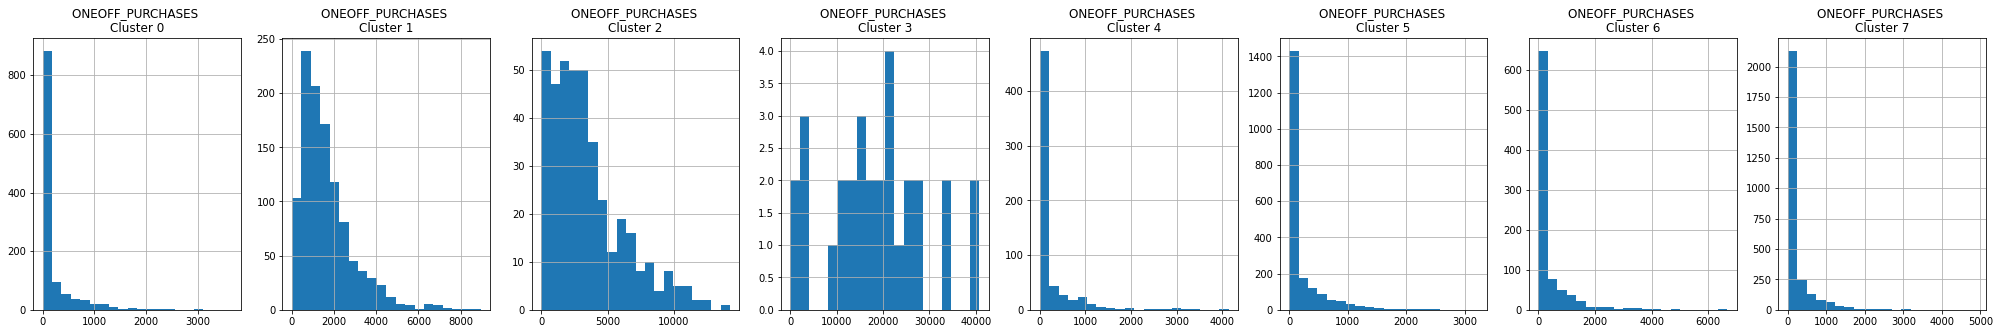

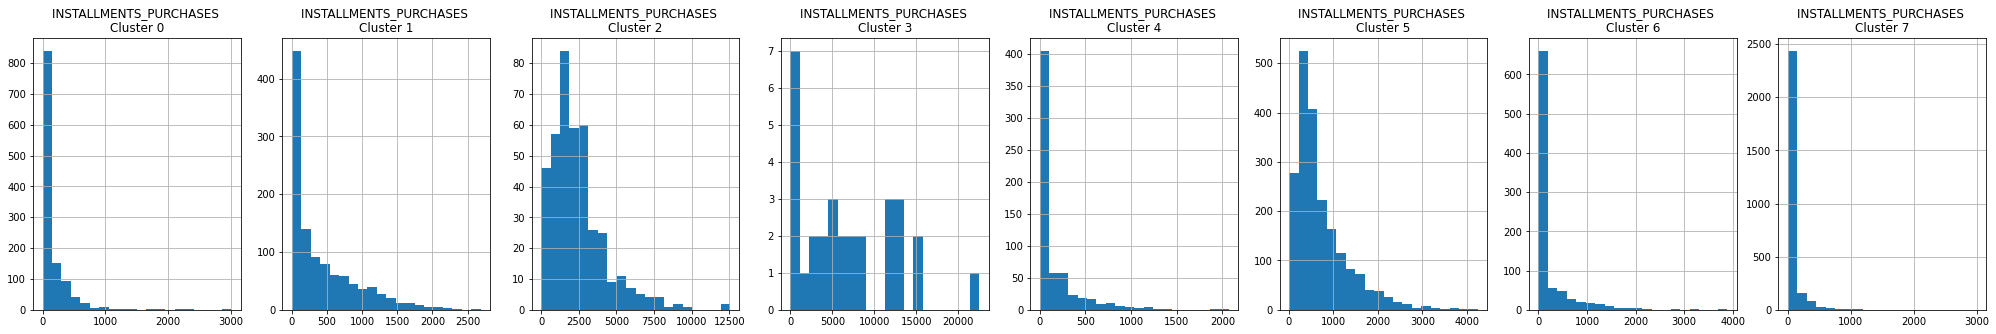

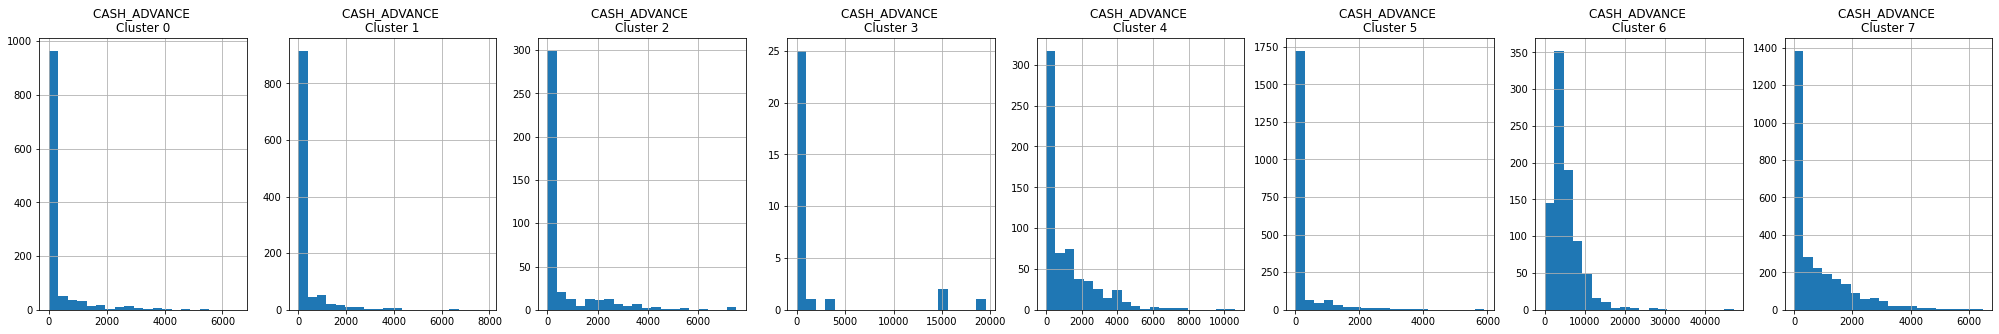

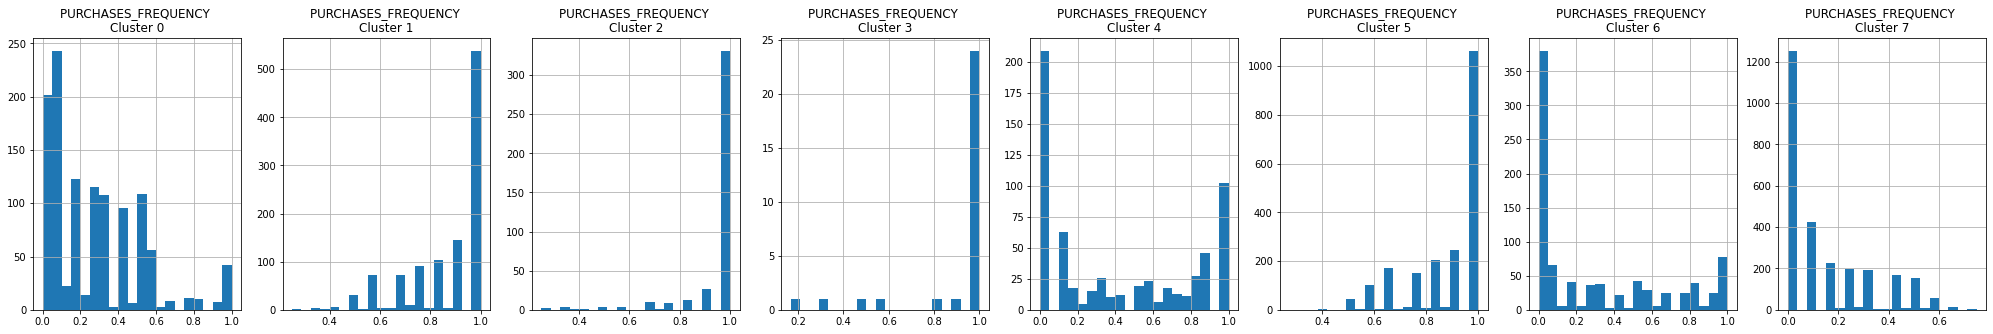

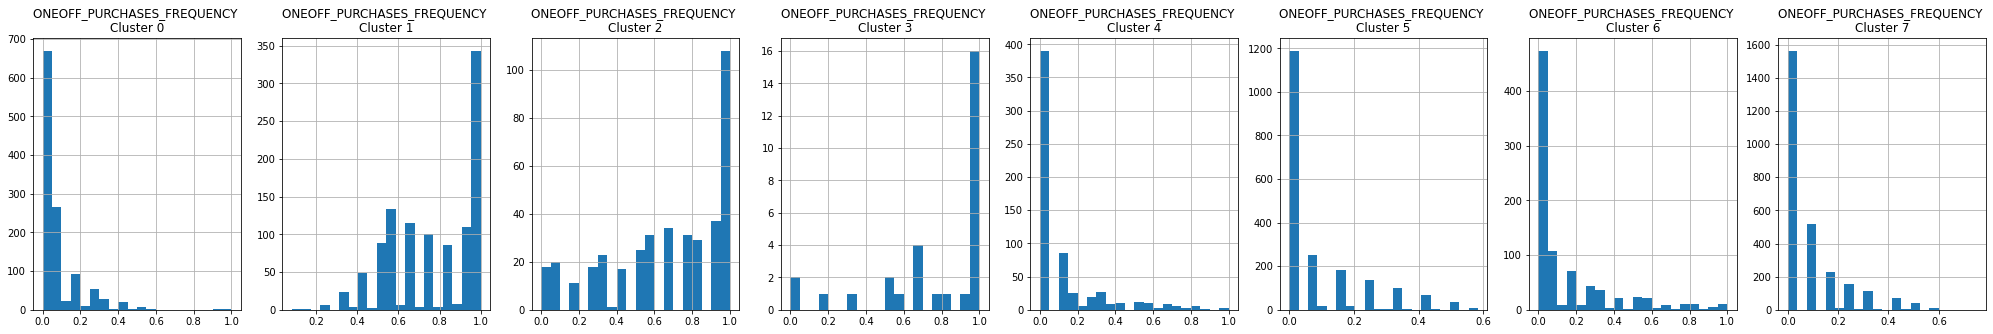

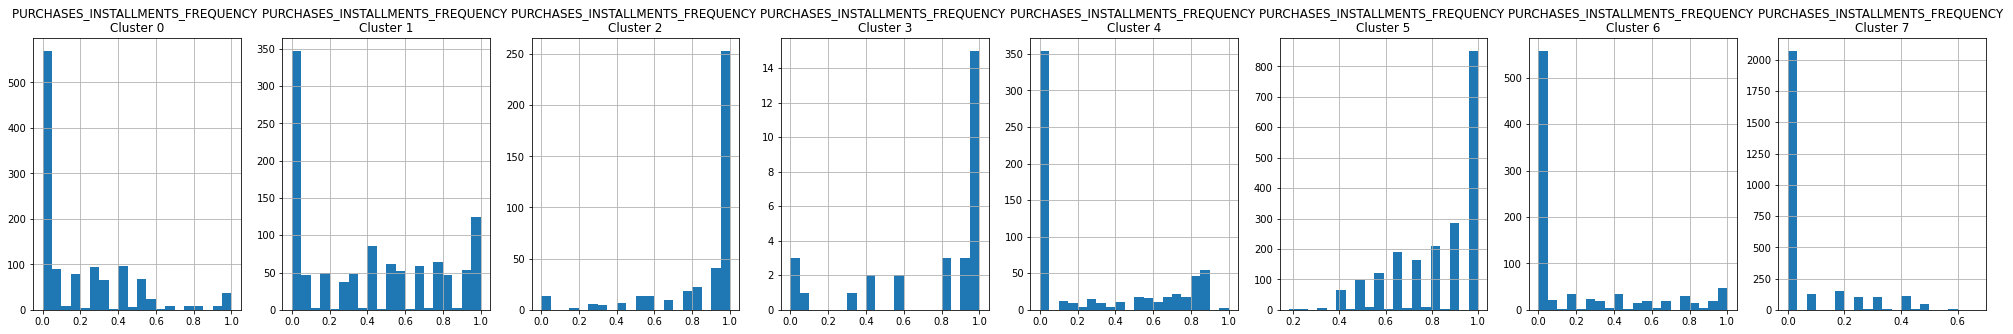

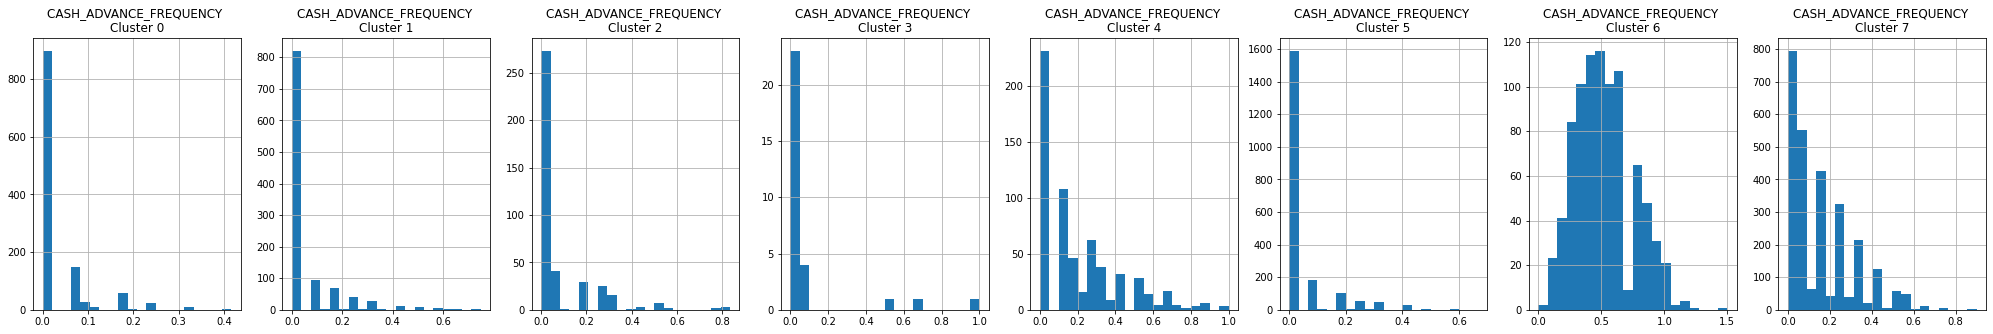

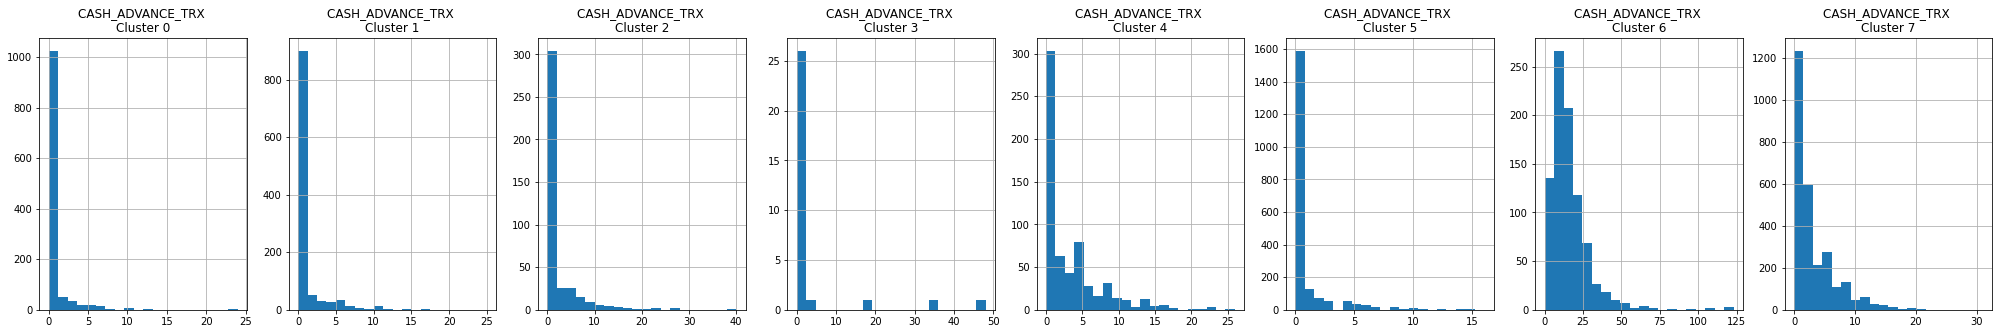

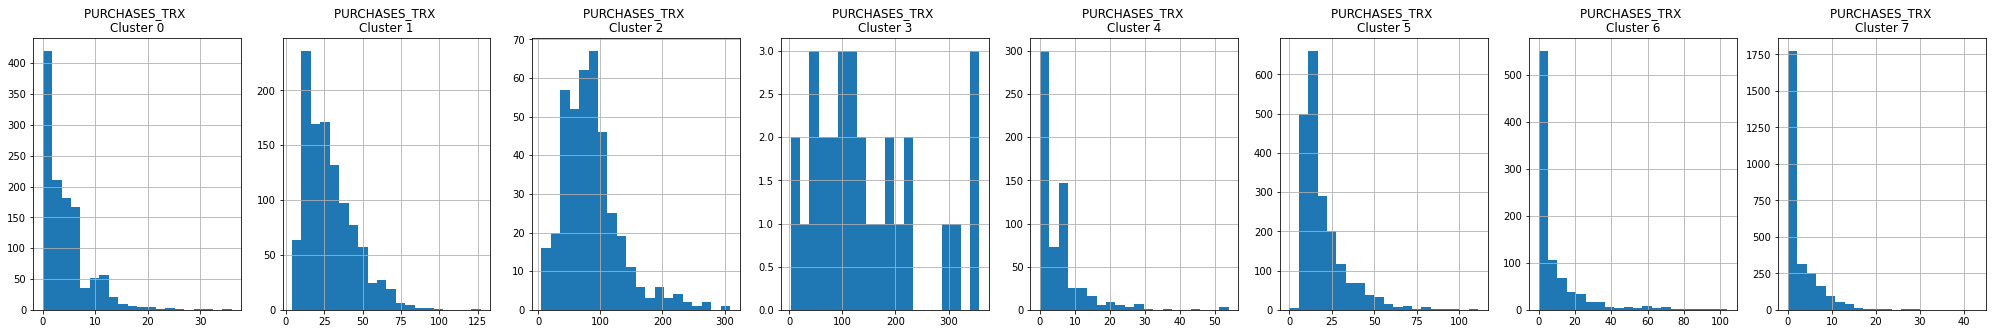

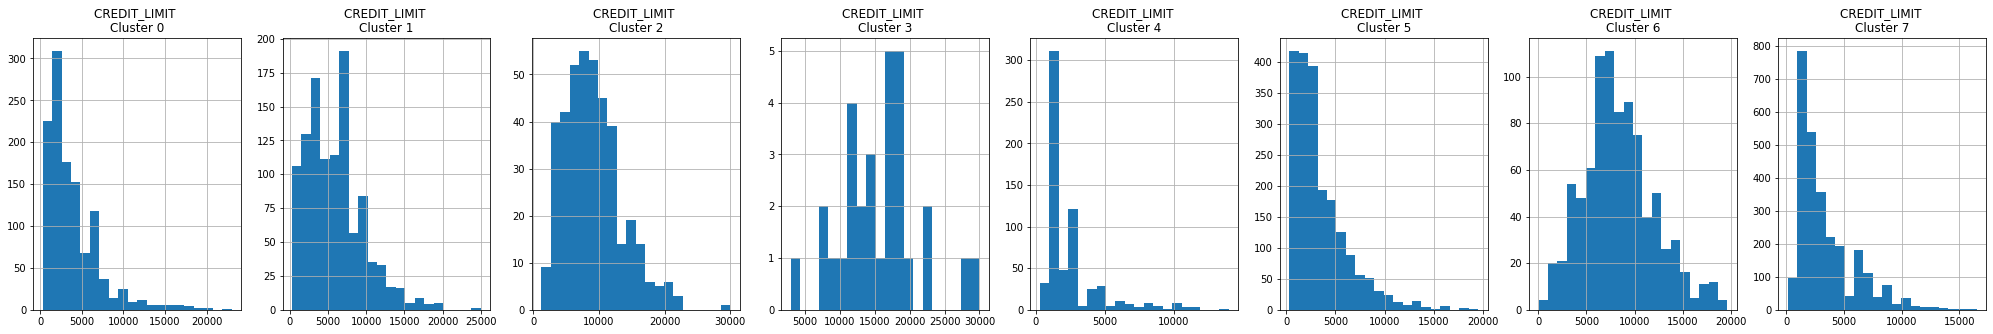

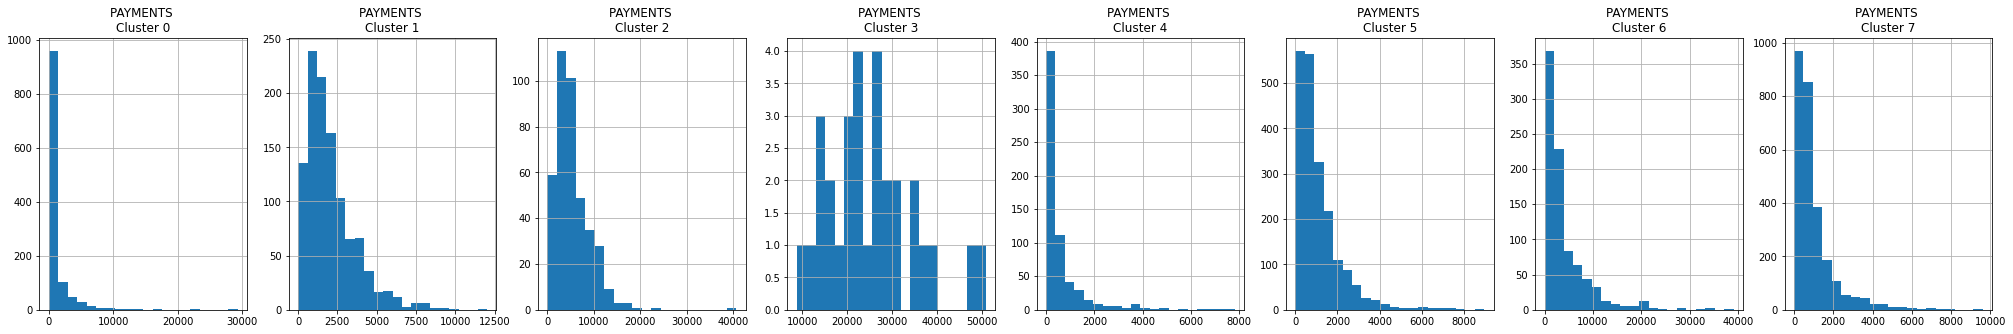

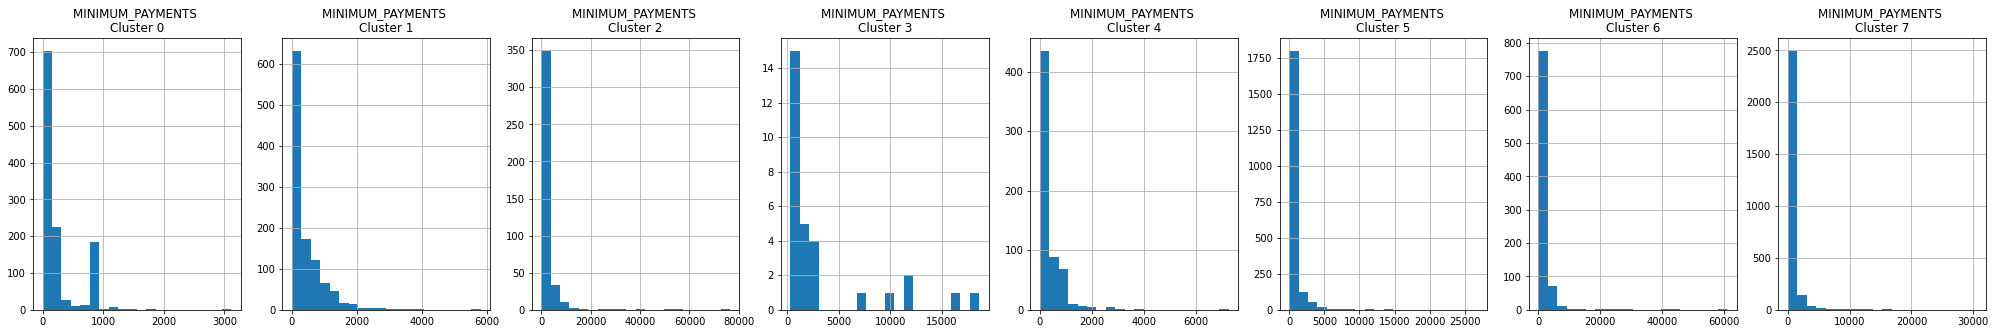

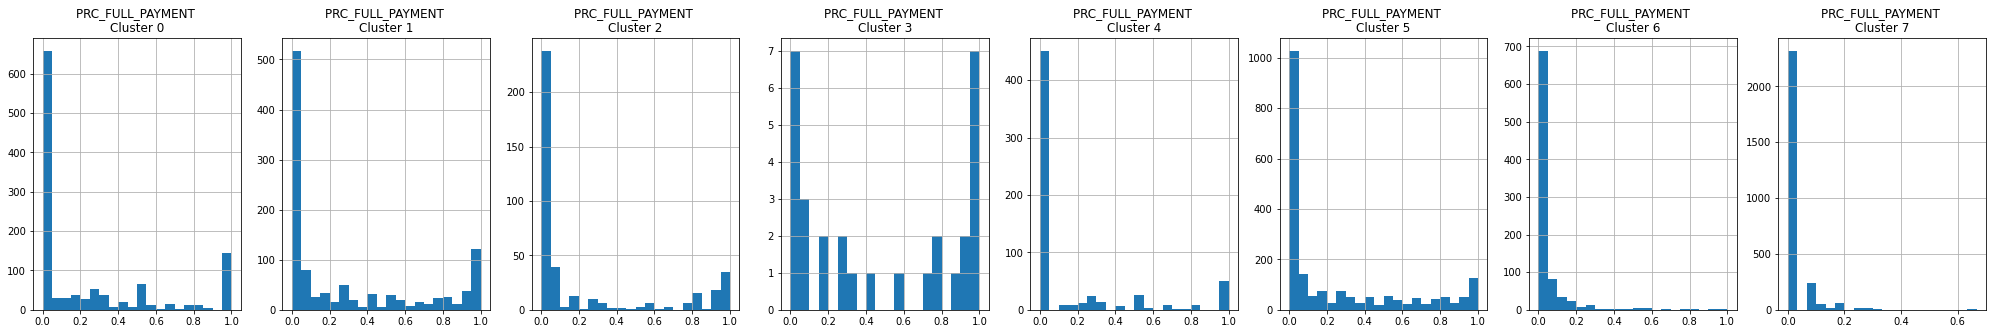

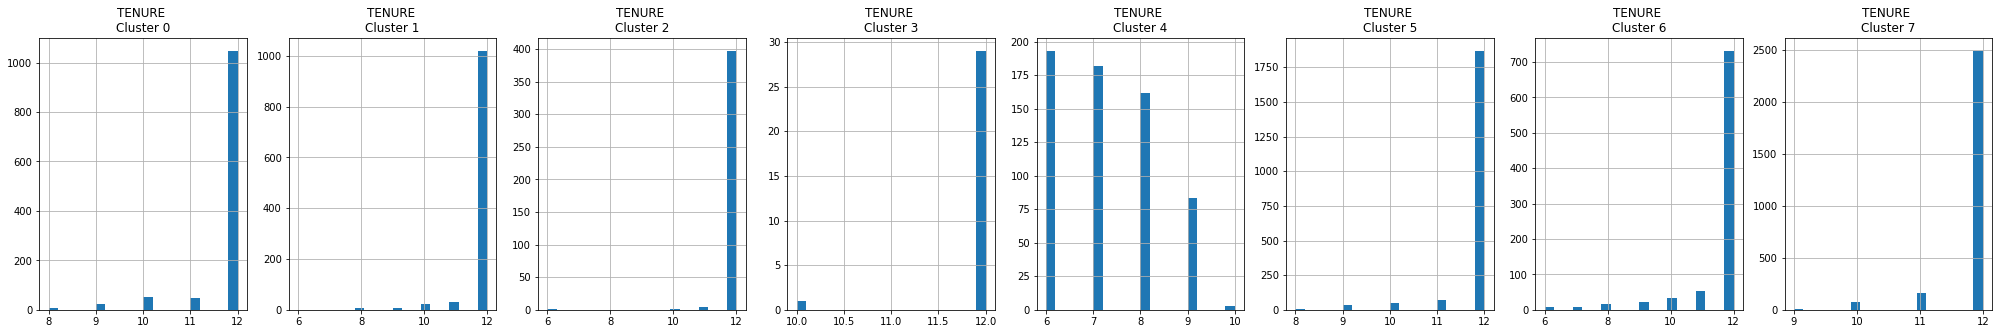

In [44]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [45]:
#Avant d envoyer nos données au service marketing pour leur analyse, on doit ordonner les donnees de notre dataset par cluster
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5910,56.060327,0.181818,13.69,0.00,13.69,0.0,0.083333,0.000000,0.083333,0.0,0,1,2900.0,2165.403988,219.961065,0.0,12,0
2925,188.701762,0.454545,900.45,900.45,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,1002.783773,74.503021,0.0,12,0
5099,6.697211,0.181818,64.69,64.69,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,2,10500.0,372.572278,81.447345,0.0,12,0
8126,12.658490,0.363636,166.32,0.00,166.32,0.0,0.333333,0.000000,0.250000,0.0,0,4,2500.0,420.051037,220.621064,1.0,12,0
6031,0.000000,0.000000,54.00,0.00,54.00,0.0,0.166667,0.000000,0.166667,0.0,0,2,4000.0,0.000000,864.206542,0.0,12,0


In [46]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4624,2118.778680,1.0,62.46,0.0,62.46,1361.312559,0.500000,0.000000,0.416667,0.250000,4,6,4000.0,1080.520104,448.013699,0.0,12,7
4635,1411.914825,1.0,0.00,0.0,0.00,127.321884,0.000000,0.000000,0.000000,0.090909,2,0,1500.0,259.780798,423.779107,0.0,11,7
4642,3699.694691,1.0,0.00,0.0,0.00,1182.596884,0.000000,0.000000,0.000000,0.416667,13,0,4000.0,769.962086,1698.538100,0.0,12,7
4591,1837.047378,1.0,0.00,0.0,0.00,73.157833,0.000000,0.000000,0.000000,0.083333,1,0,2000.0,412.848153,599.972398,0.0,12,7
4474,5256.695330,1.0,188.60,188.6,0.00,1934.418697,0.083333,0.083333,0.000000,0.333333,4,1,9000.0,1421.954639,1452.249653,0.0,12,7


In [47]:
credit_ordered.to_csv('cluster.csv')

# 4) PCA (Principal Component Analysis)

In [ ]:
#On a fait les clusters avec K-Means, mais on a pas encore fait une visualisation graphique de ces clusters.
#PCA est un algo de aprentissagem non supervisionado e a comme objectif reduire la dimensionalité de nos donnéees tout en maintenant les caracteristiques
#de ces dernières, et rencontre un ensemble des nouvelles caracteristiques qui s appelent COMPONENTS, DOnc les composants sont créés par le biais des 
#des caracteristiques non correlationnées.
#Exemple on a plusiers colonnes qu on regroupe en seulement en DEUX, donc les données similaires seront confondues et seules les données qui ont une 
#correlation faible qui seront considérées comme telles et vues comme des COMPONENTS 

In [48]:
from sklearn.decomposition import PCA

In [49]:
#pour notre projet, on souhaite grouper toutes les colonnes de notre dataset en seulement 2, tout en rappelant que toutes les 20 colonnes sont representées
#Dans dans creditcard_df_scaled
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp #Et on voit qu on a que 2 colonnes dans notre variable, dont toutes les données sont fondues en seulement 2 components

array([[-1.68222098, -1.07644673],
       [-1.13829478,  2.50647835],
       [ 0.96968318, -0.38352902],
       ...,
       [-0.92620459, -1.81078058],
       [-2.33655172, -0.65796207],
       [-0.55642025, -0.40047787]])

In [51]:
len(principal_comp), len(creditcard_df_scaled)

(8950, 8950)

In [ ]:
#On va maintenanr ajouter les clusters pour les associer a chaque ligne de notre principal_comp, tout en soulignant que de fois est compliqué de 
#comprendre ces données vu la complexité des calcules qui sont utilisés pour la creation de ces componentes en PCA
#On fusionne carement les 2 DataFrames


In [53]:
#On transforme d abord la principa_comp en DataFrame avec ses colonnes labelisées PCA1 et PCA2
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head(2)

,pca1,pca2
0,-1.682221,-1.076447
1,-1.138295,2.506478


In [59]:
#On concatene ça avec les labels de clusters
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head(2)

,pca1,pca2,cluster
0,-1.682221,-1.076447,7
1,-1.138295,2.506478,6


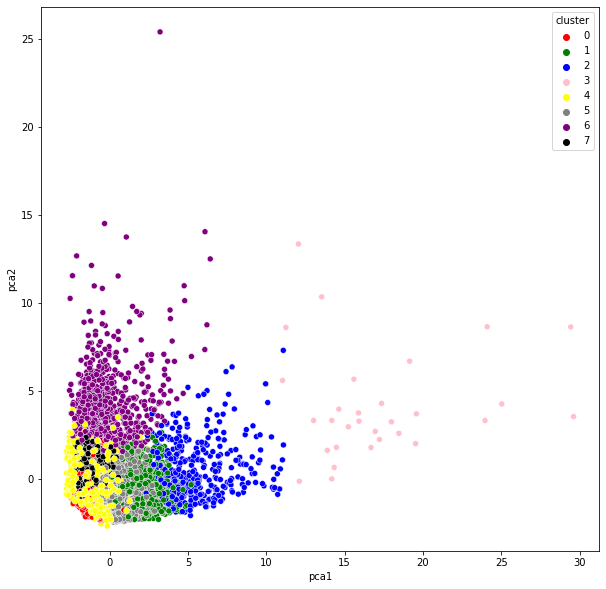

In [60]:
#on peut maintenant visualiser les groupes d une maniere graphique raison pourlquelle on avait besoin de reduire la dimensionalité avec PCA
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])
#on a donc representé chaque groupe par une couleur donnée

# 5) AUTOENCODERS

In [ ]:
#On peut faire la meme chose qu on faite avec PCA mais avec Autoencodeurs, ou aussi on peut utliser les 2
#Les autoencodeurs sont les reseaux de  neurones pour codifier les données, et utilisent la meme entrée et sortie pour comparer les resultats

In [ ]:
#Les couches de autoecnodeurs sont une version zipada de l information dans la couche du milieur (Codification), et il ne fonctionne que si il y a une nette
#corrélation entre les données, donc à la difference de PCA, car si il n y a pas de corretion, les resultats seront trop ruins

COnstruction et entrainement des autoencodeurs

In [ ]:
#L idée ici est d appliquer l entocodeur pour diminuer le nbre de colonnes de 17 a 10
#Et apres on va reapliquer tout ce qu on a fait avec greoupement K-Means abec la methode de Coude pour créer le nouveu groupe de clusters et reappliquer PCA
#Donc on combine les techniques pour optimizes les resultats...on pourra a la fin comprarer les 2 methodes en evaluant leurs resultats

In [ ]:
#D´abord on doit comprendre le fonctionnement des autoencodeurs 

In [62]:
#on partira de notre dataset scaled sans cluster
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
#Voici comment va se presenter la structure de notre autoencodeur
17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
#L autoencodeur a la particularité d avoir le meme objet est a l entrée et a la sortie, nous a l entrée, on aura 17 varaibles ou neurones d entrée, 
#Pour la partie codification ,on commence par 500 neurones ou couches, et apres 2000 neurones jusqu a 10 qui est en soit la couche de codification ou ENCODED 
#Et apres commence la decodification qui est une étape inverse de la codification, on avance donc pour 2000 neurones , et apres 500 pour revenir a 17

#OBS: on voit que on est passé de 17 neurones d entrée a 500, on l a fait expres car on a peu de données d entrée qui n est que 17, dans la realité, on
#a plusieurs voires de milions de données d entrées et que la couche suivante devrait etre inferieure a celle d entrée, pour notre exemple, pour avoir
#des bons resultats, on a augmenté la couche suivante en 500 qui est largement superieure a celle d entrée juste pour simuler

In [63]:
#CONSTRUCTION DE L AUTOENCODEUR
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [71]:
input_df = Input(shape=(17,))  #Couche d entrée 17
x = Dense(500, activation='relu')(input_df)   #2eme couche de 500 qui est liée a la couche d entrée
x = Dense(2000, activation='relu')(x)     #3eme couche de 2000 qui est liée a la 2eme couche 
#Rappel qu on utilise la fction d activation RELU car si elle recoit une valeur positive, elle y retourne telle qu elle 
#mais si elle recoit une valeur negative, elle retourne 0
encoded = Dense(10, activation='relu')(x)  #Notre couche de codification 10 qui relié à la 3eme couche

x = Dense(2000, activation='relu')(encoded) #ainsi de suite ...
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x) #On a notre couche de sortie appelée DECODED

In [72]:
# Pour appliquer l autoencoder, on passe au model la couche d entrée et la couche de sortie appelée DECODE
autoencoder = Model(input_df, decoded) #17, 17

In [73]:
# Pour faire l encoder, on passe au model la coude d entrée et la couche de codification ENCODED
encoder = Model(input_df, encoded) #17,10

In [67]:
#On va entrainer notre modele avec l autoencoder qui prend je rappelle les 2 bouts de notre processus
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')  #La fctio de loss est mean_squared_error pourque il y a 2 loss au debut et á la fin

In [68]:
#On passe 2 x le meme donnees (dataset) au model pour l entrainement car rappelons ns que le processus d autoencoder recoit la meme valeur en entrée et sortie
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 10)

Epoch 1/10
280/280 [==============================] - 8s 24ms/step - loss: 0.1854
Epoch 2/10
280/280 [==============================] - 7s 24ms/step - loss: 0.0927
Epoch 3/10
280/280 [==============================] - 7s 25ms/step - loss: 0.0579
Epoch 4/10
280/280 [==============================] - 7s 24ms/step - loss: 0.0517
Epoch 5/10
280/280 [==============================] - 7s 24ms/step - loss: 0.0510
Epoch 6/10
280/280 [==============================] - 7s 24ms/step - loss: 0.0360
Epoch 7/10
280/280 [==============================] - 7s 24ms/step - loss: 0.0330
Epoch 8/10
280/280 [==============================] - 7s 24ms/step - loss: 0.0287
Epoch 9/10
280/280 [==============================] - 7s 24ms/step - loss: 0.0273
Epoch 10/10
280/280 [==============================] - 7s 24ms/step - loss: 0.0560


In [69]:
#ON VA MAINTENANT COMPACTER NOTRE DATASET , repare que notre dataset initical a 17 colonnes
creditcard_df_scaled.shape

(8950, 17)

In [74]:
#On va le compacter avec encoder(couche de codifification) pour n avoir que 10
compact = encoder.predict(creditcard_df_scaled)

In [75]:
compact.shape

(8950, 10)

In [ ]:
#On peut meme comparer les dataset en position 0 de chacun

In [76]:
creditcard_df_scaled[0]  #On a toutes les 17 colonnes

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [77]:
compact[0] #On a que 10 colonnes, les autres sont remplacées par des 0

array([0.        , 0.05694999, 0.        , 0.        , 0.        ,
       0.04676784, 0.06105969, 0.        , 0.        , 0.00265997],
      dtype=float32)

Elbow Method, k-Means et PCA

In [78]:
#ELBOW METHOD dans compact
wcss_2 = []
range_values = range(1, 20)  #On part encore sur une suposition de 20 clusters pour apres suivre l orientation de la methode de coude
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

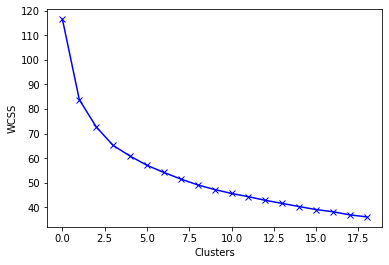

In [79]:
#on regarde sur le graphique pour savoir ou apparaite la coude, on voit qu elle apparait aux alentours de 4 a 5 
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [ ]:
#On  peut meme comprarer les 2 WCSS
plt.plot(wcss_2, 'bx-', color = 'r')
plt.plot(wcss_1, 'bx-', color = 'g');

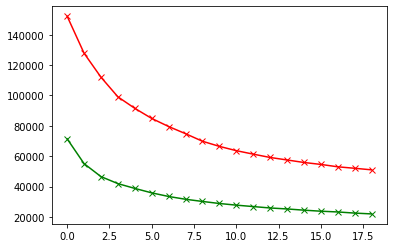

In [ ]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [83]:
#K-MEAN CONSTRUCTION DE CLUSTERS
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [84]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 0, 1, ..., 3, 3, 3], dtype=int32), (8950,))

In [85]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
#PCA pour 2 COMPONENTS

In [86]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.033356,0.059208
1,-0.050364,-0.009152
2,0.005120,-0.033557
3,0.006033,0.042723
4,-0.037193,0.065944


In [87]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.033356,0.059208,0
1,-0.050364,-0.009152,0
2,0.005120,-0.033557,1
3,0.006033,0.042723,1
4,-0.037193,0.065944,0


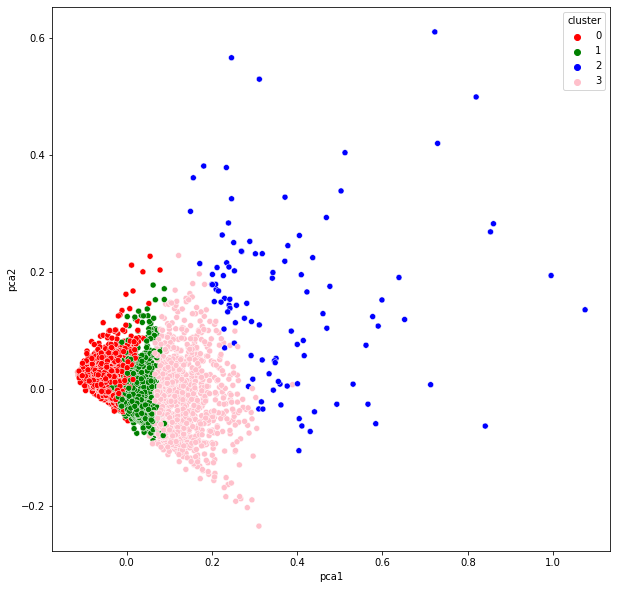

In [88]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])
#On voit sur le gaphqie suivant que nous avons un groupe de cluster bien consistent que lors du precedent processus 

In [89]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
6822,1806.845374,1.000000,0.00,0.0,0.00,3525.726761,0.000000,0.000000,0.000000,0.583333,24,0,6000.0,587.553145,608.345463,0.00,12,0
3681,2403.175046,1.000000,0.00,0.0,0.00,906.383436,0.000000,0.000000,0.000000,0.333333,15,0,2500.0,1089.627935,1784.183581,0.00,12,0
3680,561.974673,1.000000,2930.99,2279.0,651.99,0.000000,0.750000,0.333333,0.666667,0.000000,0,20,4000.0,510.359190,262.710453,0.00,12,0
3679,611.983643,1.000000,0.00,0.0,0.00,2189.894057,0.000000,0.000000,0.000000,0.166667,2,0,1700.0,2714.119535,232.121830,0.25,12,0


In [90]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1301,15.173238,0.666667,316.91,316.91,0.00,0.000000,0.666667,0.666667,0.000000,0.000000,0,6,11000.0,348.334373,71.089430,1.0,6,3
1302,541.240795,1.000000,5999.95,4104.58,1895.37,0.000000,1.000000,1.000000,1.000000,0.000000,0,97,16000.0,6850.328106,200.169985,1.0,12,3
1305,3892.352781,1.000000,6068.82,5368.71,700.11,1806.056940,0.750000,0.583333,0.333333,0.333333,12,61,7500.0,4417.825690,1764.680048,0.0,12,3
2696,5145.092629,1.000000,1975.72,679.30,1296.42,11834.205810,0.833333,0.333333,0.833333,0.333333,8,33,13500.0,9059.242461,1748.463874,0.0,12,3
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,3


In [91]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
